# Ensemble Techniques Project

## Data Description & Context:

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

## Attribute Information:

<b>name -</b> ASCII subject name and recording number <p>
<b>MDVP:Fo(Hz) - </b>Average vocal fundamental frequency <p>
<b>MDVP:Fhi(Hz) - </b>Maximum vocal fundamental frequency <p>
<b>MDVP:Flo(Hz) - </b>Minimum vocal fundamental frequency<p>
<b>MDVP:Jitter(%) - </b>MDVP jitter in percentage <p>
<b>MDVP:Jitter(Abs) - </b> MDVP absolute jitter in ms <p>
<b>MDVP:RAP - </b> MDVP Relative Amplitude Perturbation <p>
<b>MDVP:PPQ - </b> MDVP five-point Period Perturbation Quotient <p>
<b>Jitter:DDP - </b> Average absolute difference of differences between jitter cycles <p>
<b>MDVP:Shimmer - </b> MDVP local shimmer <p>
<b>MDVP:Shimmer(dB) - </b> MDVP local shimmer in dB <p>
<b>Shimmer:APQ3 - </b> Three-point amplitude perturbation quotient <p>
<b>Shimmer:APQ5 - </b> Five-point amplitude perturbation quotient <p>
<b>MDVP:APQ - </b> MDVP n point amplitude perturbation quotient <p>
<b>Shimmer:DDA - </b> Average absolute differences between the amplitudes of consecutive periods <p>
<b>NHR - </b><span style="color:blue">(Noise-to-Harmonics Ratio) </span>Measure of ratio of noise to tonal components in the voice <p>
<b>HNR - </b><span style="color:blue">(Harmonics-to-Noise Ratio) </span> Measure of ratio of noise to tonal components in the voice <p>
<b>status - </b>Health status of the subject (one) - Parkinson's, (zero) - healthy <p>
<b>RPDE - </b><span style="color:blue">(Recurrence Period Density Entropy) </span> nonlinear dynamical complexity measure<p>
<b>D2 - </b><span style="color:blue">(Correlation Dimension) </span> nonlinear dynamical complexity measure <p>
<b>DFA - </b><span style="color:blue">(Detrended Fluctuation Analysis) </span> Signal fractal scaling exponent <p>
<b>spread1, spread2 - </b>Two nonlinear measures of fundamental frequency variation <p>
<b>PPE - </b><span style="color:blue">(Pitch Period Entropy) </span> nonlinear measures of fundamental frequency variation

## Learning Outcomes:
● Exploratory Data Analysis<p>
● Supervised Learning<p>
● Ensemble Learning<p>

## Objective:
Goal is to classify the patients into the respective labels using the attributes from their voice recordings

## 1. Load the dataset

In [1]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import  MinMaxScaler
from sklearn import tree
from scipy.stats import zscore
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
data=pd.read_csv('Data - Parkinsons.csv',sep=',')
# data=pd.read_csv('cleaned-data.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard

In [3]:
data.shape # No. of rows and columns

(195, 24)

In [4]:
data.columns # display columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
data.dtypes  # data types of all columns

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
# Moving status column to the last
data1=data.pop('status') 
data['status'] = data1
data.head() # first five records

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [7]:
data=data.drop(['name'],axis=1) #dropping name column as they cannot establish the relationship with dependent variable
data.head() # first five records

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [8]:
data.isnull().values.any() # NULL value check

False

## 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations

In [9]:
data.describe().T #description of all quantitative columns/fields

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [10]:
data.status.value_counts() # People suffering from Parkinson's Disease

1    147
0     48
Name: status, dtype: int64

In [11]:
print("Percentage of people affected by Parkinson's Disease ", (147/195)*100)
print("Percentage of people not affected by Parkinson's Disease ", (48/195)*100)

Percentage of people affected by Parkinson's Disease  75.38461538461539
Percentage of people not affected by Parkinson's Disease  24.615384615384617


As the percentage of people affected by Parkinson's Disease is more than the percentage of people not affected by Parkinson's Disease it is likely that 

In [12]:
data.apply(lambda x: len(x.unique()))# finding unique data

MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
status                2
dtype: int64

### Univariate analysis

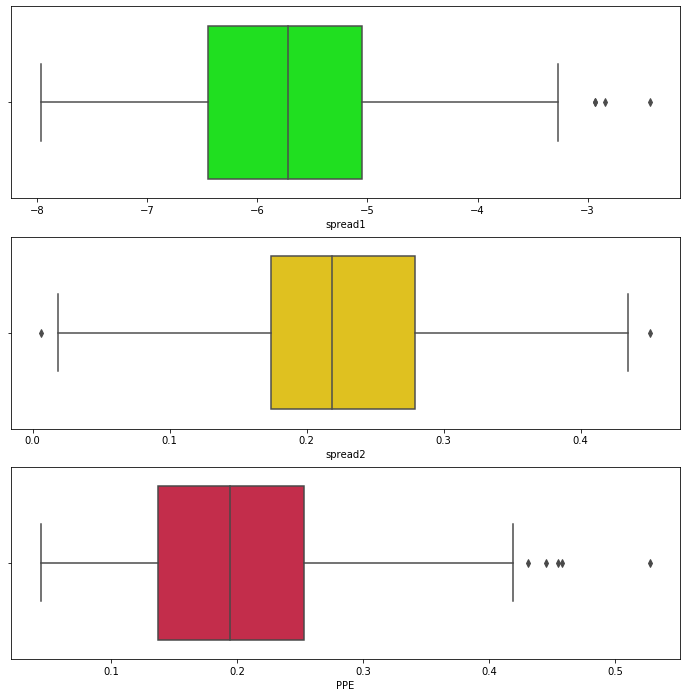

In [13]:
fig, ax = plt.subplots(3,1,figsize=(12,12)) 
sns.boxplot(x='spread1',data=data, ax=ax[0],color='lime',orient='h');
sns.boxplot(x='spread2',data=data, ax=ax[1],color='gold',orient='h');
sns.boxplot(x='PPE',data=data,ax=ax[2],color='crimson',orient='h');

All the three variations have outliers. 
Generally speaking, decision trees are able to handle outliers. It is very unlikely that decision tree will create a leaf to isolate them

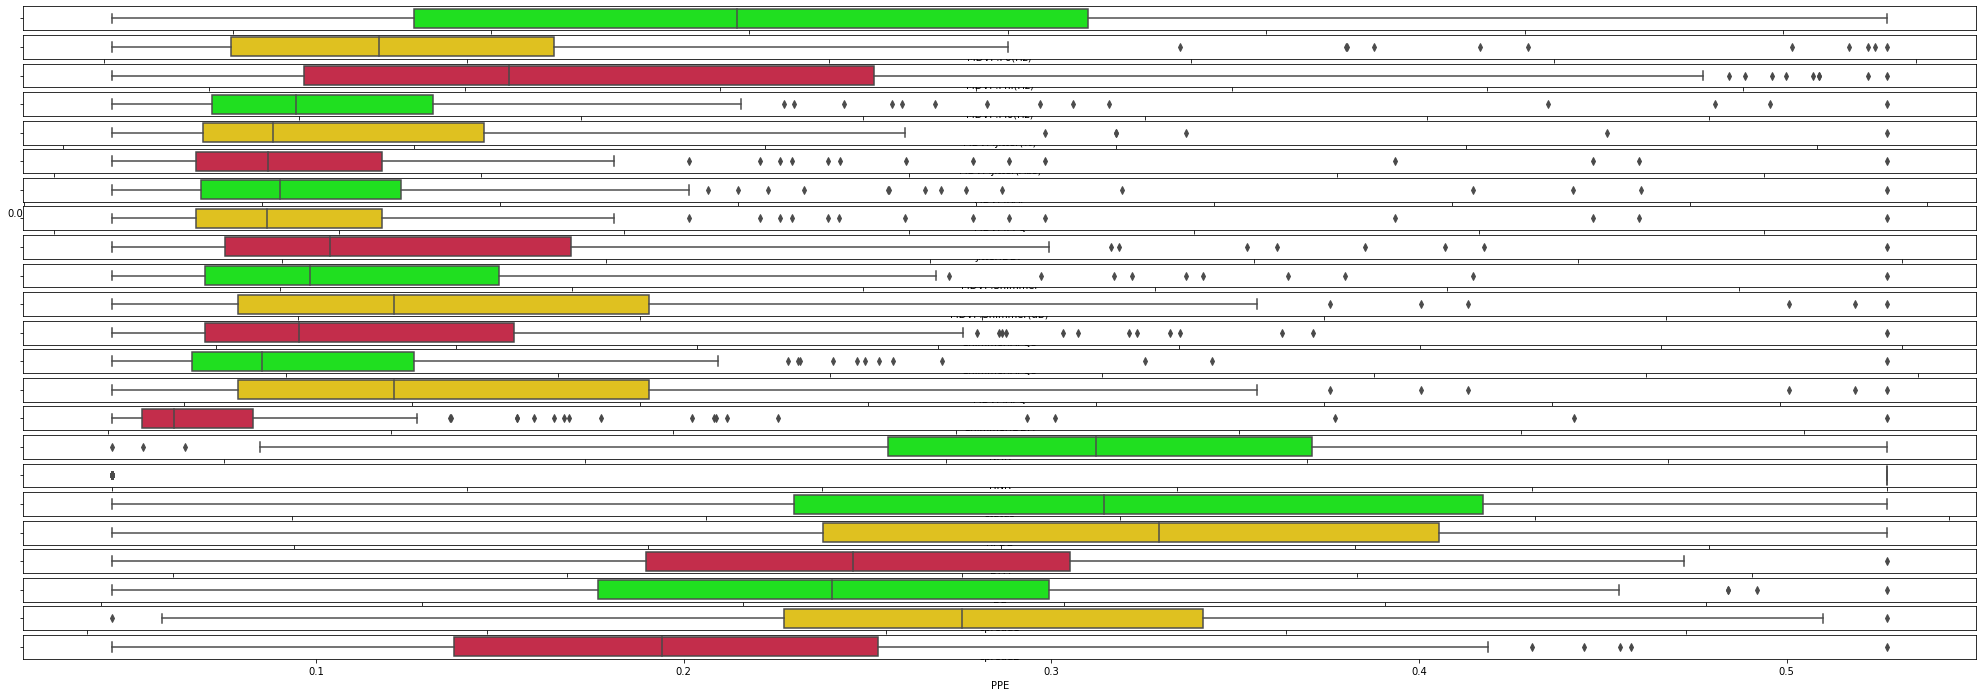

In [14]:
fig, ax = plt.subplots(23,1,figsize=(35,12)) 
sns.boxplot(x='MDVP:Fo(Hz)',data=data, ax=ax[0],color='lime',orient='h');
sns.boxplot(x='MDVP:Fhi(Hz)',data=data, ax=ax[1],color='gold',orient='h');
sns.boxplot(x='MDVP:Flo(Hz)',data=data,ax=ax[2],color='crimson',orient='h');
sns.boxplot(x='MDVP:Jitter(%)',data=data, ax=ax[3],color='lime',orient='h');
sns.boxplot(x='MDVP:Jitter(Abs)',data=data, ax=ax[4],color='gold',orient='h');
sns.boxplot(x='MDVP:RAP',data=data,ax=ax[5],color='crimson',orient='h');
sns.boxplot(x='MDVP:PPQ',data=data, ax=ax[6],color='lime',orient='h');
sns.boxplot(x='Jitter:DDP',data=data, ax=ax[7],color='gold',orient='h');
sns.boxplot(x='MDVP:Shimmer',data=data,ax=ax[8],color='crimson',orient='h');
sns.boxplot(x='MDVP:Shimmer(dB)',data=data, ax=ax[9],color='lime',orient='h');
sns.boxplot(x='Shimmer:APQ3',data=data, ax=ax[10],color='gold',orient='h');
sns.boxplot(x='Shimmer:APQ5',data=data,ax=ax[11],color='crimson',orient='h');
sns.boxplot(x='MDVP:APQ',data=data, ax=ax[12],color='lime',orient='h');
sns.boxplot(x='Shimmer:DDA',data=data, ax=ax[13],color='gold',orient='h');
sns.boxplot(x='NHR',data=data,ax=ax[14],color='crimson',orient='h');
sns.boxplot(x='HNR',data=data, ax=ax[15],color='lime',orient='h');
sns.boxplot(x='status',data=data, ax=ax[16],color='gold',orient='h');
sns.boxplot(x='RPDE',data=data, ax=ax[17],color='lime',orient='h');
sns.boxplot(x='DFA',data=data, ax=ax[18],color='gold',orient='h');
sns.boxplot(x='D2',data=data,ax=ax[19],color='crimson',orient='h');
sns.boxplot(x='spread1',data=data, ax=ax[20],color='lime',orient='h');
sns.boxplot(x='spread2',data=data, ax=ax[21],color='gold',orient='h');
sns.boxplot(x='PPE',data=data,ax=ax[22],color='crimson',orient='h');


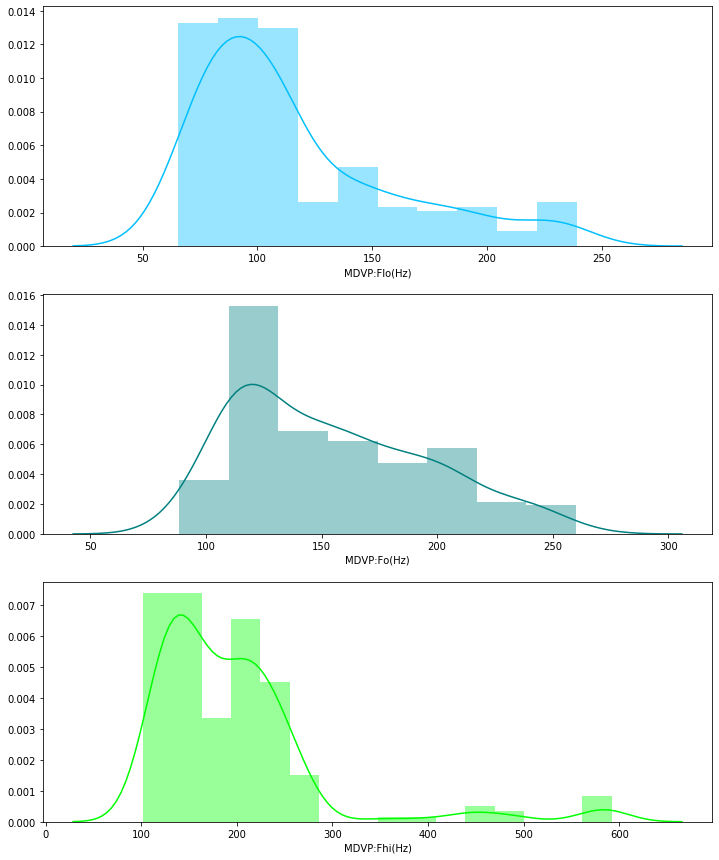

In [15]:
fig, ax = plt.subplots(3,1,figsize=(12,15)) 
sns.distplot(data['MDVP:Flo(Hz)'],ax=ax[0],color='deepskyblue');
sns.distplot(data['MDVP:Fo(Hz)'],ax=ax[1],color='teal');
sns.distplot(data['MDVP:Fhi(Hz)'],ax=ax[2],color='lime');

There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz. The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. The high vocal frequency does not have any skewness, but some range of values are at the right most tail

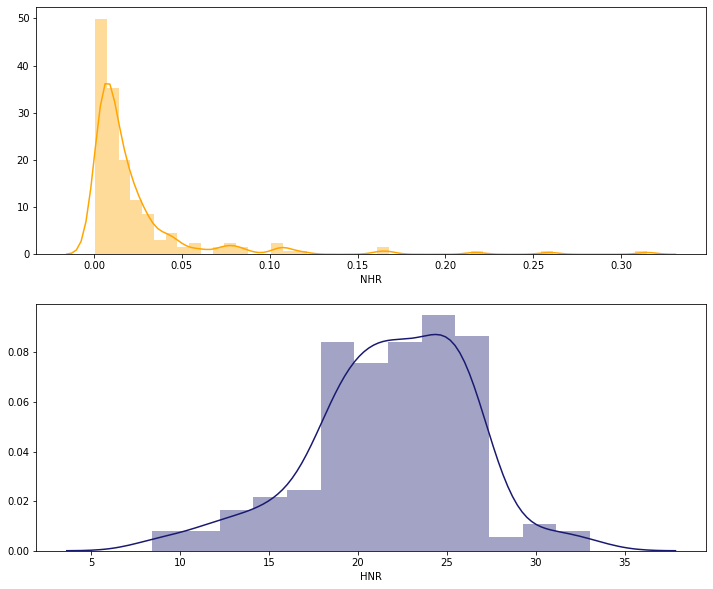

In [16]:
fig, ax = plt.subplots(2,1,figsize=(12,10)) 
sns.distplot(data['NHR'],ax=ax[0],color='orange');
sns.distplot(data['HNR'],ax=ax[1],color='midnightblue');

The measure of tonal component of frequency is shown above. The value NHR is right skewed for there are so many observations in the area, but they seem to be with very minimal values. The maximum number of observations is between 0 and 0.04. The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness.

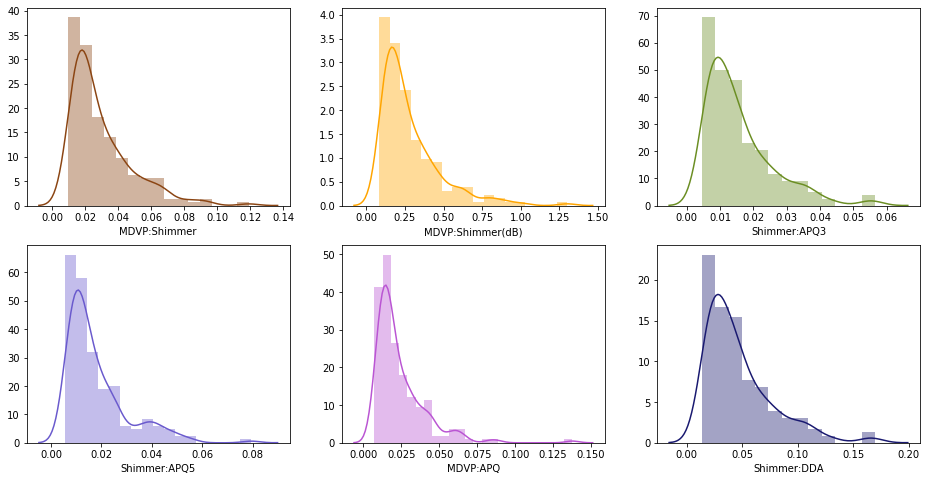

In [17]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Shimmer'],ax=ax[0,0],color='saddlebrown');
sns.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1],color='orange'); 
sns.distplot(data['Shimmer:APQ3'],ax=ax[0,2],color='olivedrab'); 
sns.distplot(data['Shimmer:APQ5'],ax=ax[1,0],color='slateblue'); 
sns.distplot(data['MDVP:APQ'],ax=ax[1,1],color='mediumorchid'); 
sns.distplot(data['Shimmer:DDA'],ax=ax[1,2],color='midnightblue');

For all of the above graphs, we can observe that the measure of variation in amplitude is positively skewed

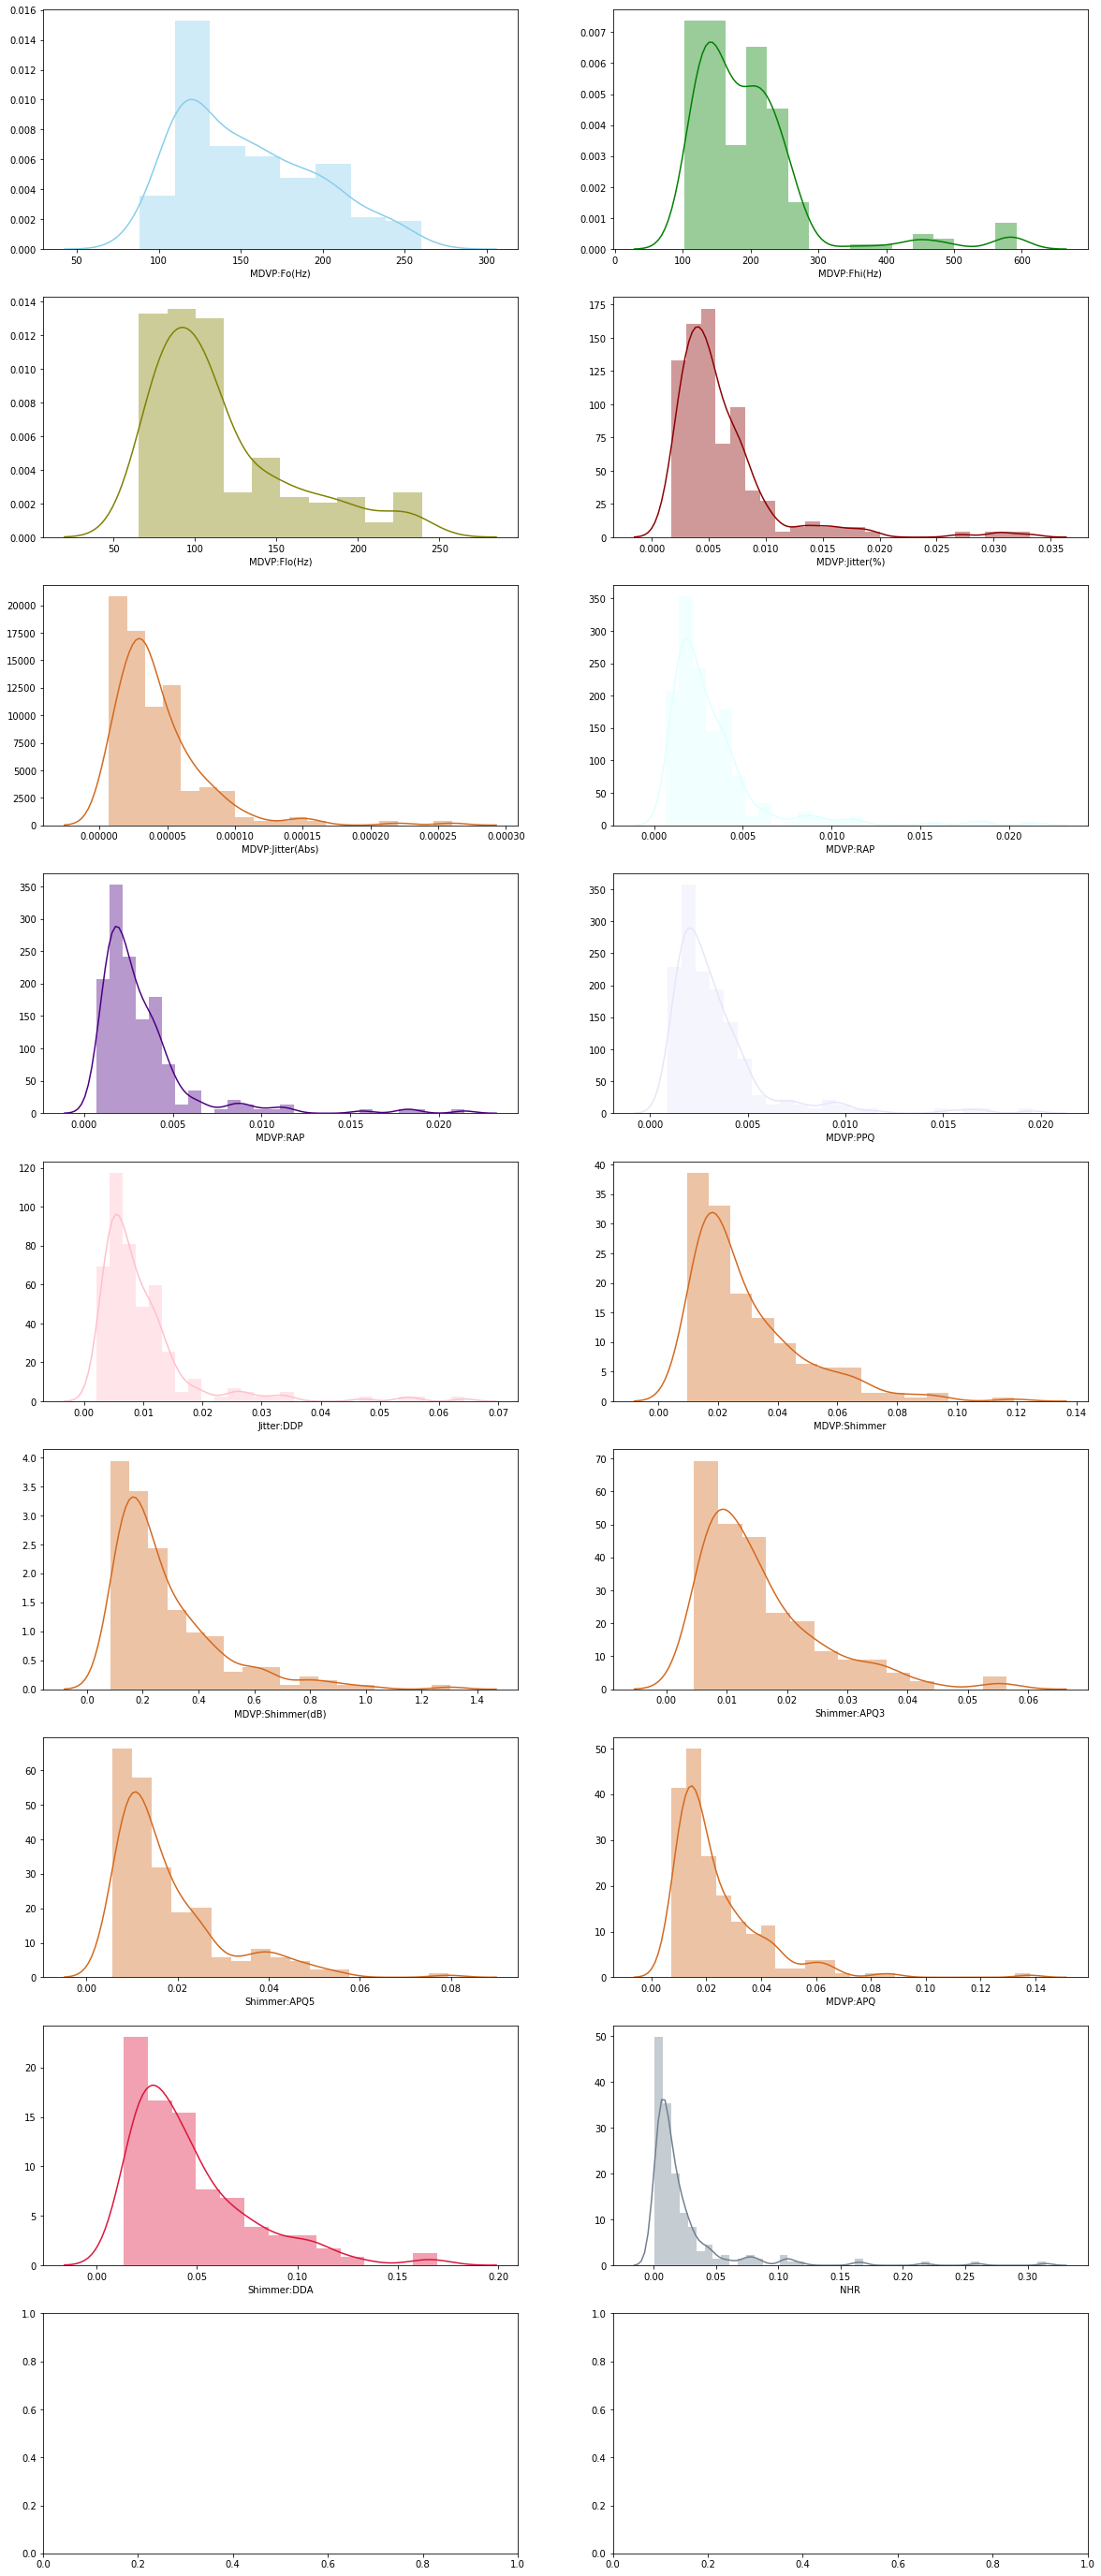

In [18]:
f, axes = plt.subplots(9,2, figsize=(20, 50), sharex=False)
sns.distplot( data["MDVP:Fo(Hz)"] , color="skyblue", ax=axes[0, 0]); # histogram plot for MDVP:Fo(Hz) column
sns.distplot( data["MDVP:Fhi(Hz)"] , color="green", ax=axes[0, 1]); # histogram plot for MDVP:Fhi(Hz) column
sns.distplot( data["MDVP:Flo(Hz)"] , color="olive", ax=axes[1, 0]); # histogram plot for MDVP:Flo(Hz) column
sns.distplot( data["MDVP:Jitter(%)"] , color="darkred", ax=axes[1, 1]); # histogram plot for MDVP:Jitter(%) column
sns.distplot( data["MDVP:Jitter(Abs)"] , color="chocolate", ax=axes[2, 0]); # histogram plot for MDVP:Jitter(Abs) column
sns.distplot( data["MDVP:RAP"] , color="lightcyan", ax=axes[2, 1]); # histogram plot for MDVP:RAP column
sns.distplot( data["MDVP:RAP"] , color="indigo", ax=axes[3, 0]); # histogram plot for MDVP:RAP column
sns.distplot( data["MDVP:PPQ"] , color="lavender", ax=axes[3, 1]); # histogram plot for MDVP:PPQ column
sns.distplot( data["Jitter:DDP"] , color="pink", ax=axes[4, 0]); # histogram plot for Jitter:DDP column
sns.distplot( data["MDVP:Shimmer"] , color="chocolate", ax=axes[4, 1]); # histogram plot for MDVP:Shimmer column
sns.distplot( data["MDVP:Shimmer(dB)"] , color="chocolate", ax=axes[5, 0]); # histogram plot for MDVP:Shimmer(dB) column
sns.distplot( data["Shimmer:APQ3"] , color="chocolate", ax=axes[5, 1]); # histogram plot for Shimmer:APQ3 column
sns.distplot( data["Shimmer:APQ5"] , color="chocolate", ax=axes[6, 0]); # histogram plot for Shimmer:APQ5 column
sns.distplot( data["MDVP:APQ"] , color="chocolate", ax=axes[6, 1]); # histogram plot for MDVP:APQ column
sns.distplot( data["Shimmer:DDA"] , color="crimson", ax=axes[7, 0]); # histogram plot for Shimmer:DDA column
sns.distplot( data["NHR"] , color="slategrey", ax=axes[7, 1]); # histogram plot for NHR column

# sns.distplot( data["status"] , color="deeppink", ax=axes[8, 1]); # histogram plot for status column


For all of the above graphs, we can observe that the measure of variation in amplitude is positively skewed

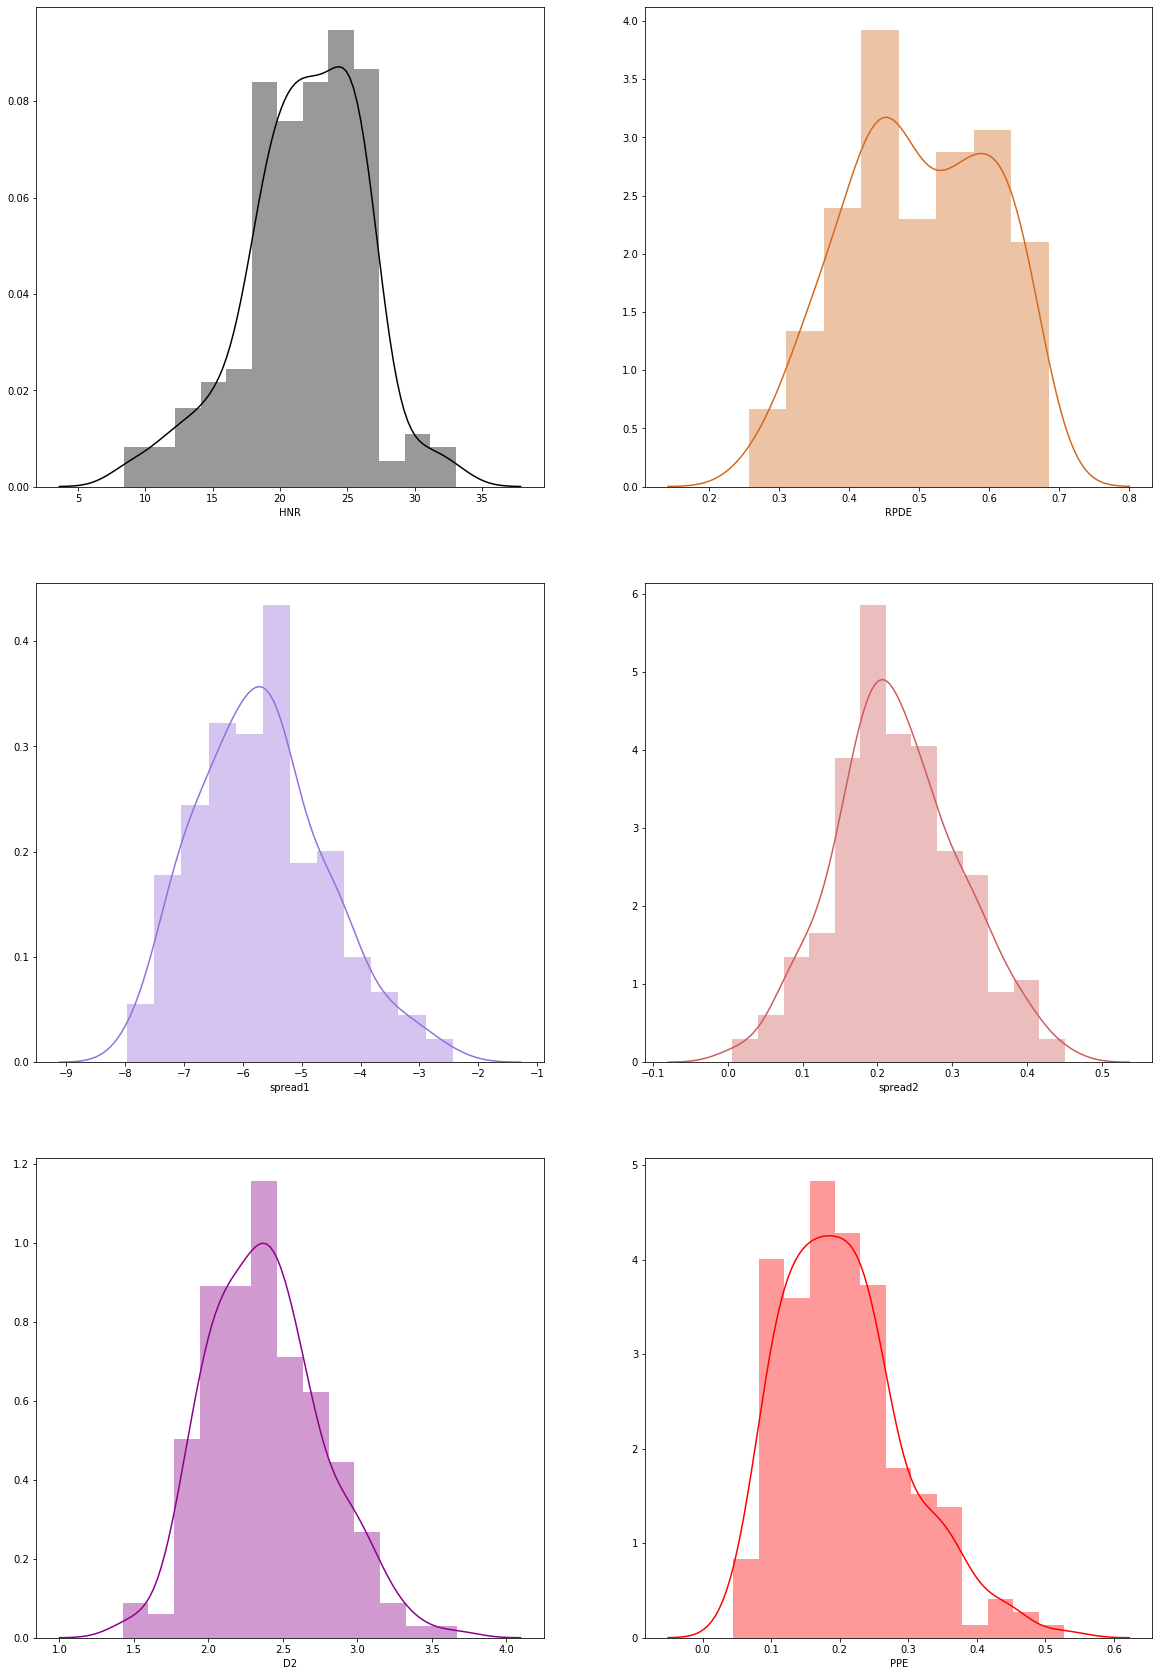

In [19]:
f, axes = plt.subplots(3,2, figsize=(20, 30), sharex=False)

sns.distplot( data["HNR"] , color="black", ax=axes[0, 0]); # histogram plot for HNR column
sns.distplot( data["RPDE"] , color="chocolate", ax=axes[0, 1]); # histogram plot for RPDE column
sns.distplot( data["spread1"] , color="mediumpurple", ax=axes[1, 0]); # histogram plot for spread1 column
sns.distplot( data["spread2"] , color="indianred", ax=axes[1, 1]); # histogram plot for spread2 column
sns.distplot( data["D2"] , color="darkmagenta", ax=axes[2, 0]); # histogram plot for D2 column
sns.distplot( data["PPE"] , color="red", ax=axes[2, 1]); # histogram plot for PPE column

For all of the above graphs, we can observe that the measure of variation in amplitude is almost normally distributed

### Bivariate analysis

In [20]:
# sns.pairplot(data,diag_kind='kde');

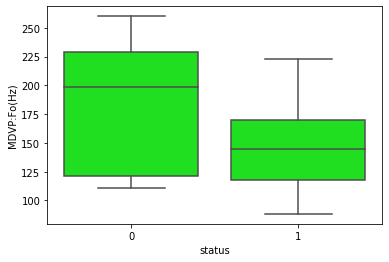

In [21]:
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=data,color='lime');

* Average vocal fundamental frequency range is comparatively lower for a person with Parkinson's disease. 
* For patients with Parkinson's Disease the values mostly lie between 120 and 175.
* For patients without Parkinson's Disease the the values mostly lie between 125 and 230.

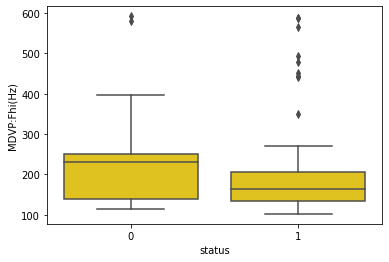

In [22]:
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=data,color='gold');


* Maximum vocal fundamental frequency range is comparatively lower for a person with Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 150 and 220. Minimum value of 100 and outliers at maximum side.
* For patients without Parkinson's Disease the the values mostly lie between 150 and 275. Minimum value of 125 and outliers at maximum side.

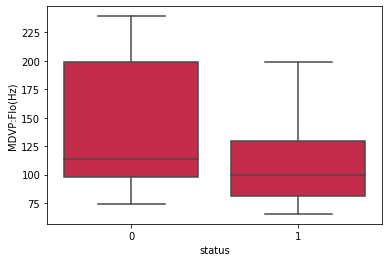

In [23]:
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=data,color='crimson');


* Minimum vocal fundamental frequency range is comparatively lower for a person with Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 80 and 125.
* For patients without Parkinson's Disease the values mostly lie between 100 and 200, with maximum value of 32 and outliers on both the side.

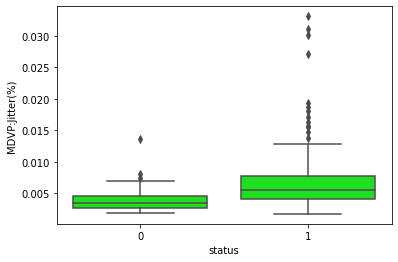

In [24]:
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=data,color='lime');


* MDVP jitter in percentage range is comparatively lower for a person without Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.005 and 0.0075, with minimum value of 0.002 and outliers at maximum side.
* For patients without Parkinson's Disease the the values mostly lie between 0.003 and 0.005, with maximum value of 0.007 and outliers at maximum side.

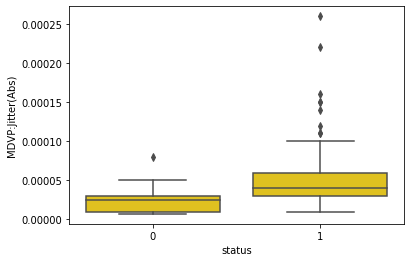

In [25]:
sns.boxplot(x='status',y='MDVP:Jitter(Abs)',data=data,color='gold');


* MDVP absolute jitter in ms(Abs) range is comparatively lower for a person without Parkinson's disease.
* For patients with Parkinson's Disease the values mostly lie between 0.00003 and 0.00006, with minimum value of 0.00001 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.00001 and 0.00003, with minimum value of 0.00001 and outliers at maximum side.

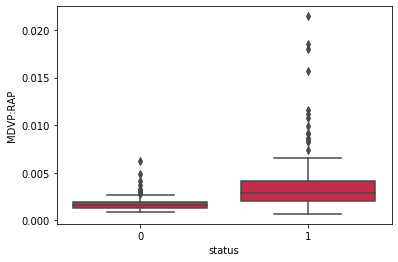

In [26]:
sns.boxplot(x='status',y='MDVP:RAP',data=data,color='crimson');


* MDVP Relative Amplitude Perturbation range is comparatively higher for a person with Parkinson's disease.
* For patients with Parkinson's Disease the values mostly lie between 0.003 and 0.004, with minimum value of 0.001 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.002 and 0.003, with minimum value of 0.001 and outliers at maximum side.

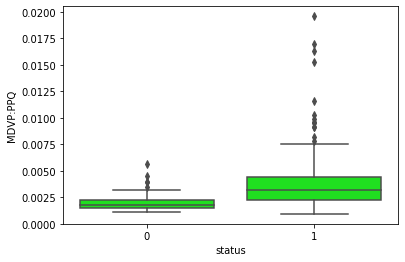

In [27]:
sns.boxplot(x='status',y='MDVP:PPQ',data=data,color='lime');


* MDVP five-point Period Perturbation Quotient range is comparatively lower for a person without Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.0025 and 0.0040, with minimum value of 0.001 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.0012 and 0.0025, with minimum value of 0.0012 and outliers at maximum side.

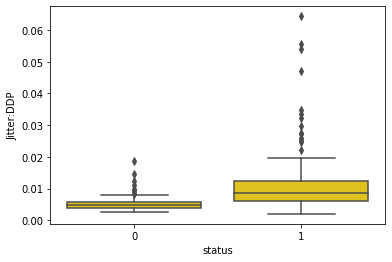

In [28]:
sns.boxplot(x='status',y='Jitter:DDP',data=data,color='gold');


* Average absolute difference of differences between jitter cycles range is comparatively higher for a person with Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.008 and 0.015, with minimum value of 0.001 and outliers at maximum side.
* For patients without Parkinson's Disease the the values mostly lie between 0.005 and 0.006, with minimum value of 0.004 and outliers at maximum side.

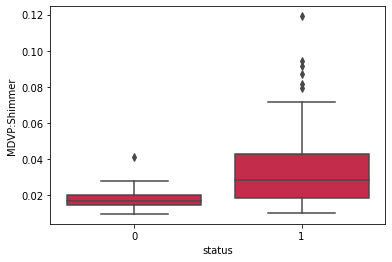

In [29]:
sns.boxplot(x='status',y='MDVP:Shimmer',data=data,color='crimson');


* MDVP local shimmer range is comparatively higher for a person with Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.02 and 0.045, with minimum value of 0.001 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.017 and 0.02, with minimum value of 0.001 and outliers at maximum side.

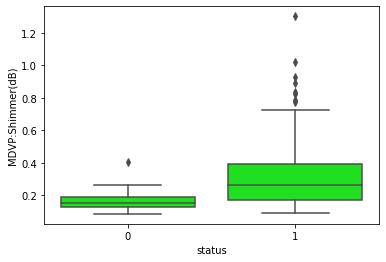

In [30]:
sns.boxplot(x='status',y='MDVP:Shimmer(dB)',data=data,color='lime');


* MDVP local shimmer in dB range is comparatively lower for a person without Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.02 and 0.045, with minimum value of 0.001 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.017 and 0.02, with minimum value of 0.001 and outliers at maximum side.

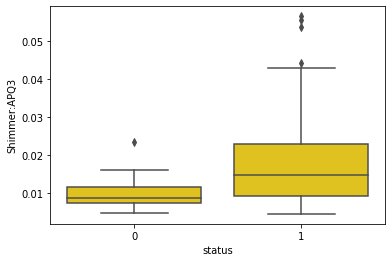

In [31]:
sns.boxplot(x='status',y='Shimmer:APQ3',data=data,color='gold');


* Three-point amplitude perturbation quotient range is comparatively lower for a person with Parkinson's disease. 
* For patients with Parkinson's Disease the values mostly lie between 0.01 and 0.025, with minimum value of 0.001 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.007 and 0.012, with minimum value of 0.001 and outliers at maximum side.

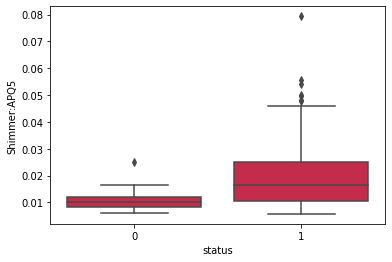

In [32]:
sns.boxplot(x='status',y='Shimmer:APQ5',data=data,color='crimson');


* Five-point amplitude perturbation quotient range is comparatively lower for a person with Parkinson's disease .
* For patients with Parkinson's Disease the values mostly lie between 0.01 and 0.027, with minimum value of 0.001 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.007 and 0.012, with minimum value of 0.005 and outliers at maximum side.

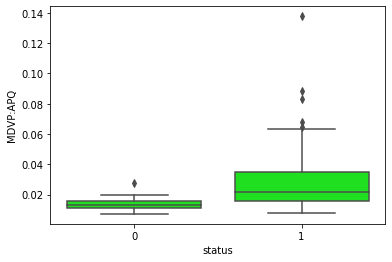

In [33]:
sns.boxplot(x='status',y='MDVP:APQ',data=data,color='lime');


* MDVP n point amplitude perturbation quotient range is comparatively higher for a person with Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.02 and 0.038, with minimum value of 0.01 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.016 and 0.018, with minimum value of 0.005 and outliers at maximum side.

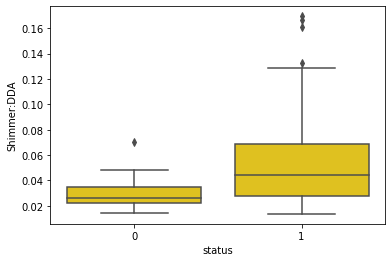

In [34]:
sns.boxplot(x='status',y='Shimmer:DDA',data=data,color='gold');


* Average absolute differences between the amplitudes of consecutive periods range is comparatively higher for a person with Parkinson's disease.
* For patients with Parkinson's Disease the values mostly lie between 0.03 and 0.07, with minimum value of 0.01 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.021 and 0.038, with minimum value of 0.005 and outliers at maximum side.

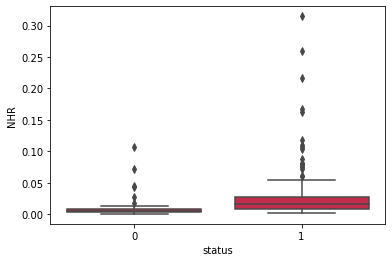

In [35]:
sns.boxplot(x='status',y='NHR',data=data,color='crimson');


* Noise-to-Harmonics Ratio (Measure of ratio of noise to tonal components in the voice) range is comparatively lower for a person without Parkinson's disease.
* For patients without Parkinson's Disease the values mostly lie between 0.001 and 0.003, with minimum value of 0.0001 and outliers  at maximum side.

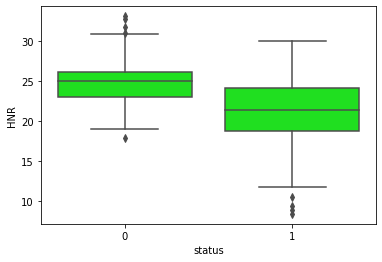

In [36]:
sns.boxplot(x='status',y='HNR',data=data,color='lime');


* Harmonics-to-Noise Ratio(Measure of ratio of noise to tonal components in the voice) range is comparatively higher for a person with Parkinson's disease.
* For patients with Parkinson's Disease the values mostly lie between 19 and 24, with maximum value of 30 and outliers at minimum side.
* For patients without Parkinson's Disease the values mostly lie between 23 and 26, with maximum value of 32 and outliers on both the side.

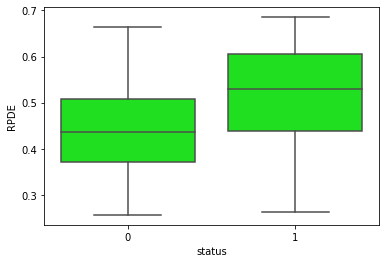

In [37]:
sns.boxplot(x='status',y='RPDE',data=data,color='lime');


* Recurrence Period Density Entropy (nonlinear dynamical complexity measure) range is comparatively higher for a person with Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.45 and 0.6, with maximum value of 0.68 and minimum at 0.15 with no outliers on both the side.
* For patients without Parkinson's Disease the values mostly lie between 0.37 and 0.51, with maximum value of 0.67 and minimum at 0.1 with no outliers on both the side.

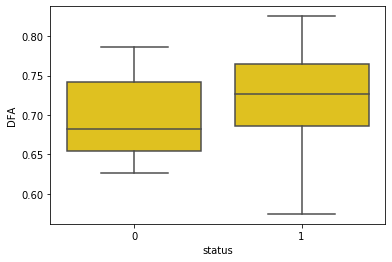

In [38]:
sns.boxplot(x='status',y='DFA',data=data,color='gold');


* Detrended Fluctuation Analysis (Signal fractal scaling exponent) range is comparatively lower in range for a person without Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.68 and 0.76, with maximum value of 0.90 and minimum at 0.30 with no outliers on both the side.
* For patients without Parkinson's Disease the values mostly lie between 0.66 and 0.74, with maximum value of 0.79 and minimum at 0.63 with no outliers on both the side.

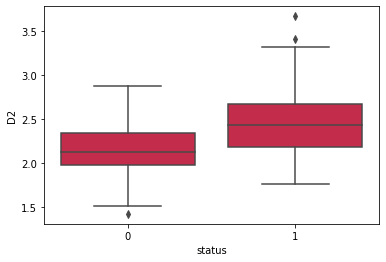

In [39]:
sns.boxplot(x='status',y='D2',data=data,color='crimson');


* Correlation Dimension(nonlinear dynamical complexity measure) range is comparatively higher for a person with Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 2.25 and 2.75, with minimum value of 1.75 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 1.95 and 2.4, with maximum value of 2.8 and outliers at minimum side.

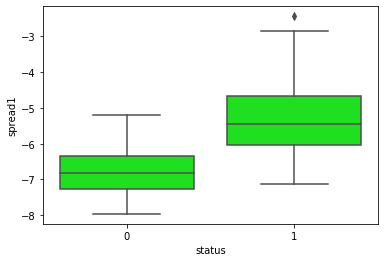

In [40]:
sns.boxplot(x='status',y='spread1',data=data,color='lime');


* spread1 range is comparatively lower for a person without Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between -6 and -5.2, with minimum value of -7.25 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between -7.2 and -6.3, with maximum value of -5.2 and  minimum value at -7.9 with no outliers side.

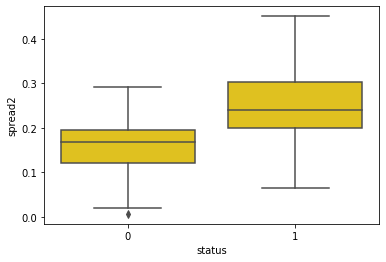

In [41]:
sns.boxplot(x='status',y='spread2',data=data,color='gold');


* spread2 range is comparatively higher for a person with Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.2 and 0.3, with maximum value of 0.5 and  minimum value at 0.05 with no outliers at both sides.
* For patients without Parkinson's Disease the values mostly lie between 1.25 and 0.2, with maximum value of 0.3 and outliers at minimum side.

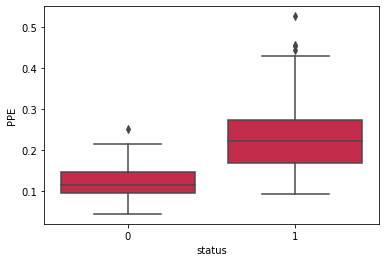

In [42]:
sns.boxplot(x='status',y='PPE',data=data,color='crimson');

* Pitch Period Entropy (nonlinear measures of fundamental frequency variation) range is comparatively higher for a person with Parkinson's disease 
* For patients with Parkinson's Disease the values mostly lie between 0.17 and 0.25, with minimum value of 0.1 and outliers at maximum side.
* For patients without Parkinson's Disease the values mostly lie between 0.1 and 0.15, with minimum value of 0.03 and outliers at maximum side.

In [43]:
data_corr=data.corr()

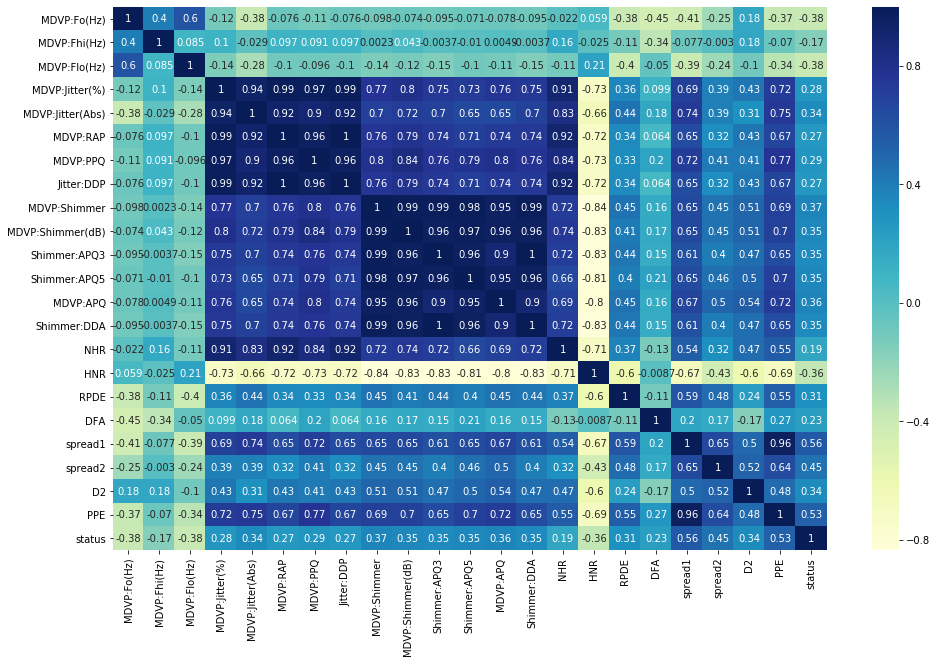

In [44]:
plt.subplots(figsize =(16, 10)) 
sns.heatmap(data_corr,cmap="YlGnBu",annot=True);

MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. This may be because multi-dimensinal voice programs analysis is closely related with these variables
The target variable status has a weak positive corelation with spread1



## 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [45]:
X=data.drop('status',axis=1)

In [46]:
y=data['status']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)
print(len(X_train)),print(len(X_test))

136
59


(None, None)

In [48]:
#Lets check the Split Ratio before and after Split
print("Original status True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['status'] == 1]), (len(data.loc[data['status'] == 1])/len(data.index)) * 100))
print("Original status False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['status'] == 0]), (len(data.loc[data['status'] == 0])/len(data.index)) * 100))
print("")
print("Training status True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training status False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test status True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test status False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original status True Values    : 147 (75.38%)
Original status False Values   : 48 (24.62%)

Training status True Values    : 107 (78.68%)
Training status False Values   : 29 (21.32%)

Test status True Values        : 40 (67.80%)
Test status False Values       : 19 (32.20%)



## 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc

In [49]:
# sc = MinMaxScaler(feature_range=(0,1))
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [50]:
# XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
# XScaled.describe()

In [51]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# a=scaler.fit(X_train)
# print(a.mean_)
# X_train=a.transform(X_train)

In [52]:
# b=scaler.fit(X_test)
# print(b.mean_)
# X_test=b.transform(X_test)

In [53]:
# from sklearn.preprocessing import StandardScaler

# std_scale = StandardScaler()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# # print(np.percentile(x_train[:, 0], [0, 25, 50, 75, 100]))
# #quantile_transformer = preprocessing.QuantileTransformer(n_quantiles =136,random_state=1)
# from sklearn.preprocessing import StandardScaler

# std_scale = StandardScaler()
# X_train = std_scale.fit_transform(X_train)
# X_test = std_scale.transform(X_test)

In [54]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()


X = data.drop('status',axis=1)     # Predictor feature columns (8 X m)

Y = data['status']   # Predicted class (1=Prakinson's Patient, 0=Healthy) (1 X m)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

std_scale = std_scale.fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [55]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

69.74% data is in training set
30.26% data is in test set


## 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

###  Logistic Regression

In [56]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2        3         4         5         6  \
0 -0.540812 -0.295293 -0.099222 -0.52524 -0.518743  0.304152 -0.207206   

          7         8         9  ...        13        14        15        16  \
0  0.304274  0.201216  0.186788  ...  0.075823 -0.212585 -0.056513 -0.211231   

        17        18        19        20        21  intercept  
0  0.24863  0.935272  0.110481  1.043262  0.635146   2.263207  

[1 rows x 23 columns]


In [57]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8135593220338984


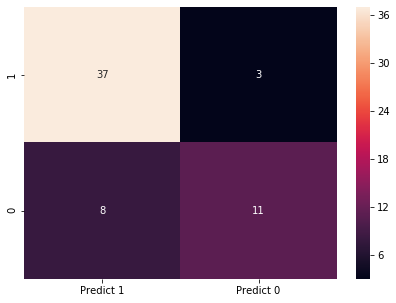

In [58]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [59]:
# Summarise
print('Accuracy of Logistic Regression model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,y_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,y_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,y_predict)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,y_predict)))

Accuracy of Logistic Regression model on test set: 81.36%
Misclassification Rate: It is often wrong: 18.64%
Sensitivity/Recall: When its actually yes how often it predicts yes: 92.50%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 82.22%


### Naive Bayes’

In [60]:
# create the model
data_model = GaussianNB()
data_model.fit(X_train, y_train)

GaussianNB()

In [61]:
data_train_predict = data_model.predict(X_train)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, data_train_predict)))
print()

Model Accuracy: 0.7206



In [62]:
data_test_predict = data_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, data_test_predict)))
print()

Model Accuracy: 0.6780



Confusion Matrix


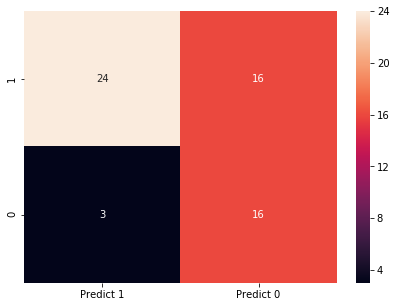

In [63]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, data_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [64]:
print(metrics.accuracy_score(y_test,data_test_predict))
print(metrics.recall_score(y_test,data_test_predict))
print(metrics.precision_score(y_test,data_test_predict))

0.6779661016949152
0.6
0.8888888888888888


In [65]:
# Summarise
# Summarise
print('Accuracy of Naive Bayes’ model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,data_test_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,data_test_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,data_test_predict)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,data_test_predict)))

Accuracy of Naive Bayes’ model on test set: 67.80%
Misclassification Rate: It is often wrong: 32.20%
Sensitivity/Recall: When its actually yes how often it predicts yes: 60.00%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 88.89%


### SVM

In [66]:
clf = svm.SVC(gamma=0.025, C=3)

In [67]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [68]:
y_pred = clf.predict(X_test)

In [69]:
y_grid = (np.column_stack([y_test, y_pred]))

In [70]:
clf.score(X_test,y_test)

0.847457627118644

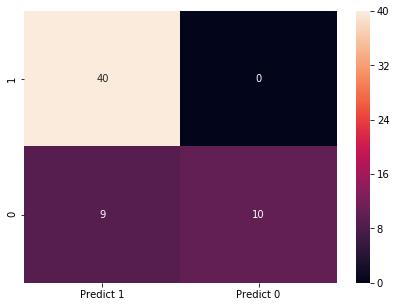

In [71]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [72]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))

0.847457627118644
1.0
0.8163265306122449


In [73]:
# Summarise
print('Accuracy of SVM model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,y_pred)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,y_pred))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,y_pred)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,y_pred)))

Accuracy of SVM model on test set: 84.75%
Misclassification Rate: It is often wrong: 15.25%
Sensitivity/Recall: When its actually yes how often it predicts yes: 100.00%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 81.63%


### K-NN

In [74]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [75]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [76]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8813559322033898

Confusion Matrix


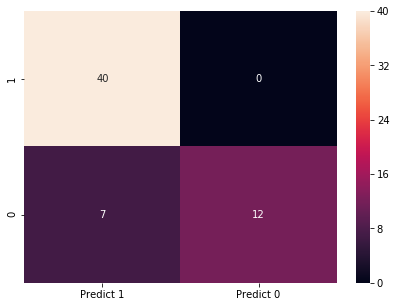

In [77]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d');

In [78]:
print(metrics.accuracy_score(y_test,predicted_labels))
print(metrics.recall_score(y_test,predicted_labels))
print(metrics.precision_score(y_test,predicted_labels))

0.8813559322033898
1.0
0.851063829787234


In [79]:
# Summarise
print('Accuracy of KNN model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,predicted_labels)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,predicted_labels))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,predicted_labels)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,predicted_labels)))

Accuracy of KNN model on test set: 88.14%
Misclassification Rate: It is often wrong: 11.86%
Sensitivity/Recall: When its actually yes how often it predicts yes: 100.00%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 85.11%


## 7. Train a meta-classifier and note the accuracy on test data

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=1)),
    ('svr', make_pipeline(GradientBoostingClassifier(random_state=1)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

0.864406779661017

The accuracy of StackingClassifier is 0.864406779661017

## 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

### Decision Tree

In [81]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=42)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
dTree.score(X_test , y_test) 

0.864406779661017

In [83]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)
dt_model.fit(X_train, y_train)
dt_model.score(X_test , y_test) 

0.8983050847457628

In [84]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[14,  5],
       [ 1, 39]], dtype=int64)

In [85]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.864406779661017


In [86]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1,min_samples_leaf=17)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8897058823529411
0.8135593220338984


0.8135593220338984


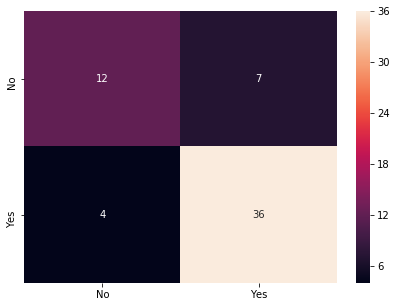

In [87]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [88]:
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.recall_score(y_test,y_predict))
print(metrics.precision_score(y_test,y_predict))

0.8135593220338984
0.9
0.8372093023255814


In [89]:
# Summarise
print('Accuracy of Decision Tree model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,y_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,y_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,y_predict)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,y_predict)))

Accuracy of Decision Tree model on test set: 81.36%
Misclassification Rate: It is often wrong: 18.64%
Sensitivity/Recall: When its actually yes how often it predicts yes: 90.00%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 83.72%


### Bagging

In [90]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8305084745762712


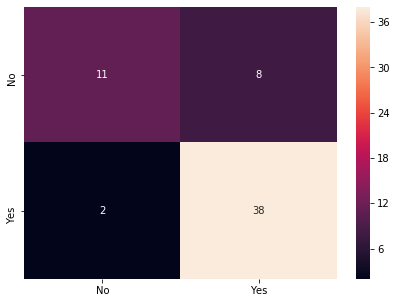

In [91]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [92]:
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.recall_score(y_test,y_predict))
print(metrics.precision_score(y_test,y_predict))

0.8305084745762712
0.95
0.8260869565217391


In [93]:
# Summarise
print('Accuracy of Bagging model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,y_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,y_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,y_predict)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,y_predict)))

Accuracy of Bagging model on test set: 83.05%
Misclassification Rate: It is often wrong: 16.95%
Sensitivity/Recall: When its actually yes how often it predicts yes: 95.00%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 82.61%


### Boosting

#### Ensemble Learning - GradientBoost

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8813559322033898


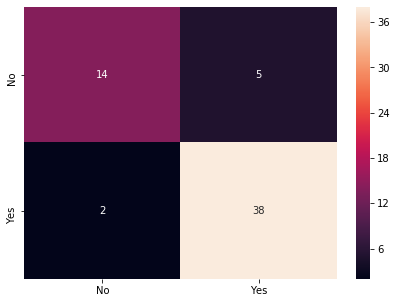

In [95]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [96]:
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.recall_score(y_test,y_predict))
print(metrics.precision_score(y_test,y_predict))

0.8813559322033898
0.95
0.8837209302325582


In [97]:
# Summarise
print('Accuracy of GradientBoost model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,y_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,y_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,y_predict)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,y_predict)))

Accuracy of GradientBoost model on test set: 88.14%
Misclassification Rate: It is often wrong: 11.86%
Sensitivity/Recall: When its actually yes how often it predicts yes: 95.00%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 88.37%


### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)
rfcl.score(X_test, y_test)

0.864406779661017

0.864406779661017


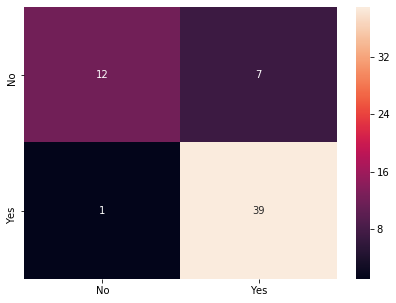

In [99]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [100]:
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.recall_score(y_test,y_predict))
print(metrics.precision_score(y_test,y_predict))

0.864406779661017
0.975
0.8478260869565217


In [101]:
# Summarise
print('Accuracy of Random Forest model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,y_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,y_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,y_predict)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,y_predict)))

Accuracy of Random Forest model on test set: 86.44%
Misclassification Rate: It is often wrong: 13.56%
Sensitivity/Recall: When its actually yes how often it predicts yes: 97.50%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 84.78%


In [102]:
X1 = data.drop('status',axis=1)
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X1.columns))

                       Imp
MDVP:Fo(Hz)       0.092164
MDVP:Fhi(Hz)      0.064312
MDVP:Flo(Hz)      0.038470
MDVP:Jitter(%)    0.024358
MDVP:Jitter(Abs)  0.032004
MDVP:RAP          0.094280
MDVP:PPQ          0.031666
Jitter:DDP        0.035668
MDVP:Shimmer      0.026814
MDVP:Shimmer(dB)  0.020511
Shimmer:APQ3      0.027330
Shimmer:APQ5      0.023636
MDVP:APQ          0.040578
Shimmer:DDA       0.034392
NHR               0.009947
HNR               0.016437
RPDE              0.040560
DFA               0.025230
spread1           0.123088
spread2           0.037724
D2                0.035938
PPE               0.124894


## 9. Compare all the models (minimum 5) and pick the best one among them

Area under curve for model Logistic Regression = 0.751974
Area under curve for model KNN = 0.789474
Area under curve for model Naive Bayes = 0.721053
Area under curve for model Random Forest = 0.736842
Area under curve for model Gradient Boost = 0.817105


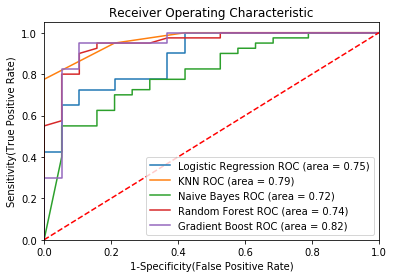

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=1)),
    ('svr', GradientBoostingClassifier(random_state=1)),
    ('knn', KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )),
    ('nb', GaussianNB())
]
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'Gradient Boost',
    'model': GradientBoostingClassifier(),
}

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    print("Area under curve for model %s = %f" %(m['label'], auc))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

As per the above figure we can concur that Gradient Boosting has the biggest Area under curve i.e 0.82

### As per the Accuracy and other metrics calculated for other models, Gradient Boosting Model has the highest Accuracy of 88.14 %. 
### Hence Gradient Boosting is the best model as it performs better than others models from the accuracy & respective findings from Confusion Matrix and ROC/AUC.